In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading data

In [2]:
HOUSING_PATH = os.path.join("datasets","housing")

In [3]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


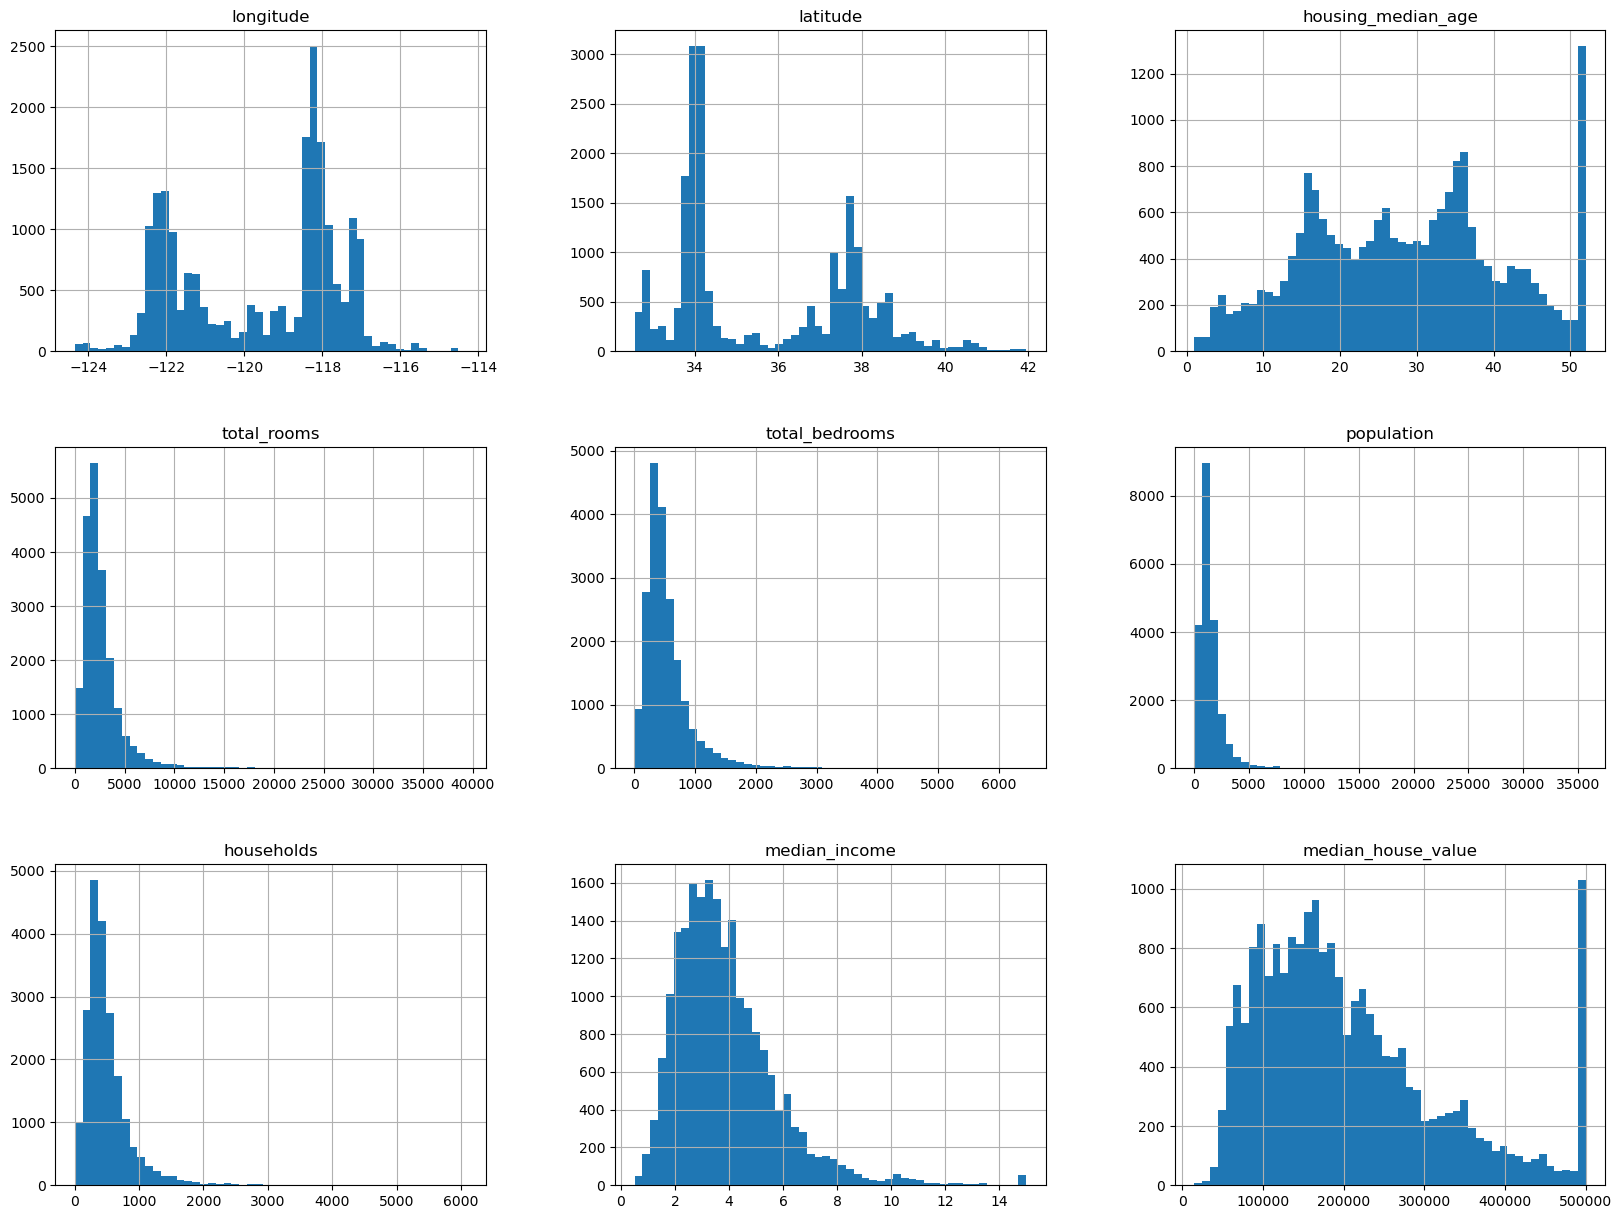

In [8]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Creating  test set

### Random Sampling

In [9]:
#I'm going to write a function for randomly selecting 20% of the data from the dataset.
def split_train_test(data, test_ratio):
    np.random.seed(42)           #to generate same random values for every run
    shuffled_indices = np.random.permutation(len(data)) #generates an random array with values ranges in 0 to len(data)
    test_set_size = int(len(data) * test_ratio)         #size of test set
    test_indices = shuffled_indices[:test_set_size]     #assign first random values to test set
    train_indices = shuffled_indices[test_set_size:]    #assing rest to train set
    return data.iloc[train_indices], data.iloc[test_indices] #returns corresponding rows

In [10]:
train_set, test_set = split_train_test(housing, 0.2)

In [11]:
print("Length of Train set :", len(train_set))
print("Length of Train set :", len(test_set))

Length of Train set : 16512
Length of Train set : 4128


In [12]:
# Using sklearn train_test_split function

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Stratified Sampling

In [13]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0.,1.5,3.,4.5,6.,np.inf], labels=[1,2,3,4,5])

<AxesSubplot:>

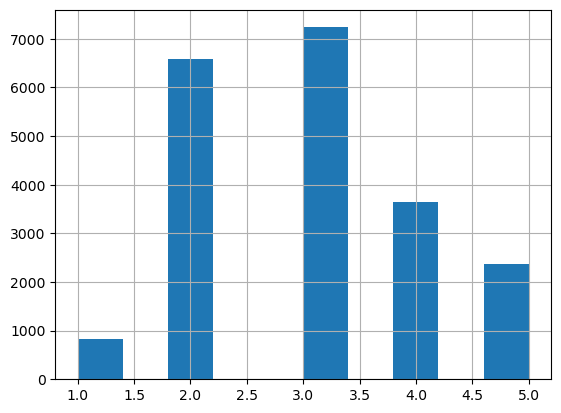

In [14]:
housing["income_cat"].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## Discover and visualize the data to gain insights

In [17]:
#Making a copy so that original will be protected
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

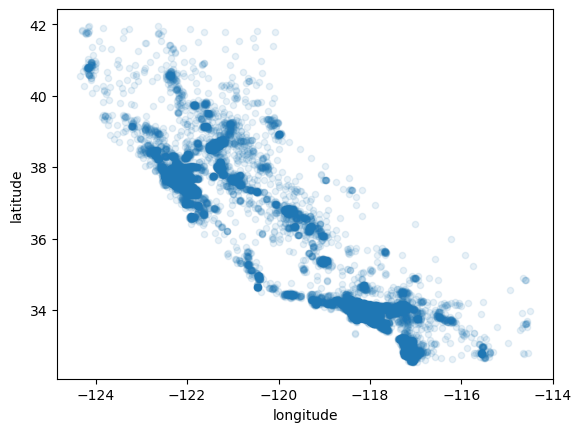

In [18]:
#Visualizing geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

This shows the high density areas in california

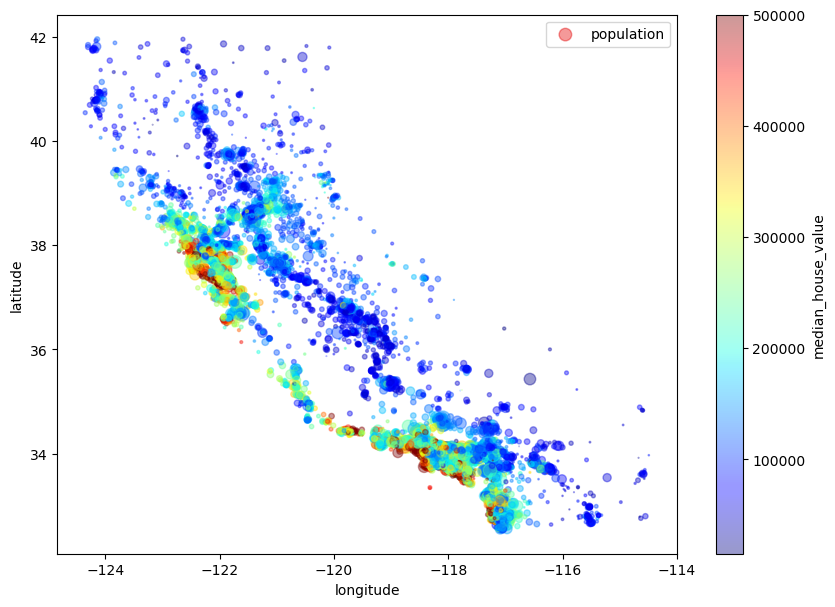

In [19]:
#Housing prices
#The radius of each circle represents districts population, color represents the price.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )

plt.legend()

In [20]:
#Looking for correlations

corr_matrix = housing.corr()

/tmp/ipykernel_15930/1211968479.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

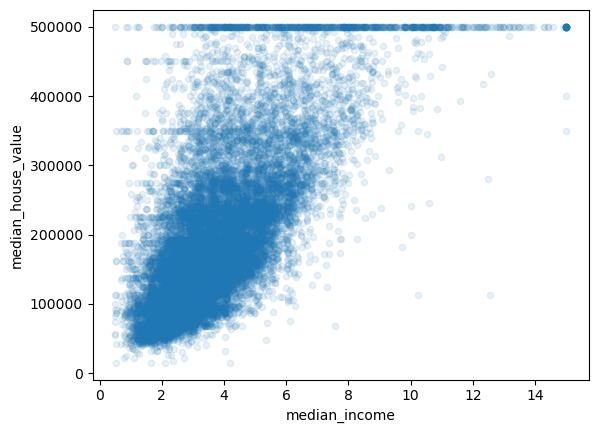

In [22]:
#median_income is the most promising attribute to predict the median income so have a closer look 
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [23]:
# generating new attributes for better performance
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [24]:
corr_matrix = housing.corr()

/tmp/ipykernel_15930/2466220658.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [25]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688380
rooms_per_household         0.143663
total_rooms                 0.137455
housing_median_age          0.102175
households                  0.071426
total_bedrooms              0.054635
population                 -0.020153
population_per_household   -0.038224
longitude                  -0.050859
latitude                   -0.139584
bedrooms_per_room          -0.256397
Name: median_house_value, dtype: float64

### Prepare the data

In [26]:
#separating predictors and target value
housing = strat_train_set.drop("median_house_value",axis=1)
housing_label = strat_train_set["median_house_value"].copy()

### Data cleaning

In [27]:
#Function to calculate median and use for future
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [28]:
#creating df with only numericals for imputer
housing_num = housing.drop("ocean_proximity", axis=1)

In [29]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [30]:
#returns median for each numerical attribute
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [31]:
#Transforming training set by replacing missing values
X = imputer.transform(housing_num)

In [32]:
#Handling text data
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [33]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom transformers

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

In [35]:
#Custom class for adding attributes
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
                    
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [36]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

In [37]:
#for normalization use minmaxscaler from sklearn
#but we use standardization to prevent outliners
#We also look at pipelines which enables applying multiple transformations at once.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [38]:
num_pipeline = Pipeline([
    
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    
])

In [39]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [40]:
#Use a common transformer for num data and cat data
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)